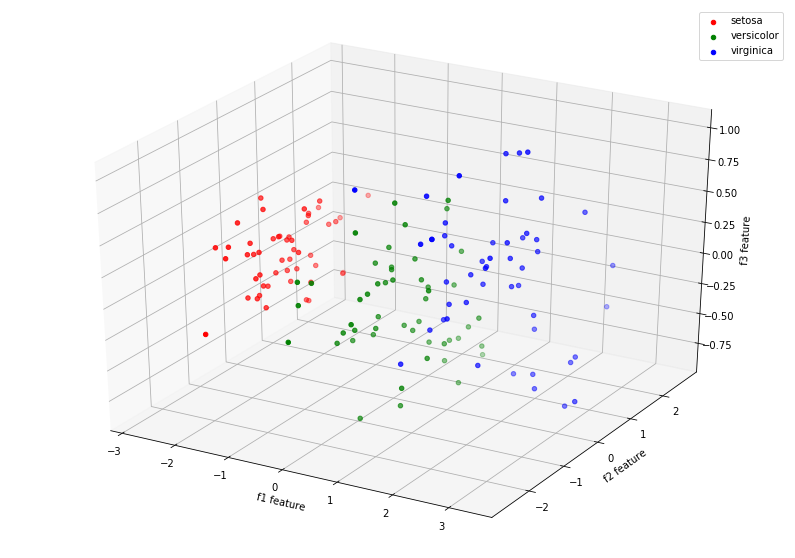

In [1]:
# 2.Problem Statement
# In this assignment students have to transform iris data into 3 dimensions
# and plot a 3d chart with transformed dimensions and colour each data
# point with specific class.
# Hint:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn import decomposition
# from sklearn import datasets


# imports 
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

# Load Iris data
Data, Target, Target_names = datasets.load_iris()['data'], datasets.load_iris()['target'], datasets.load_iris()['target_names']

# Convert data to Dataframe
df = pd.DataFrame(Data)

# Standardised the data
sd = StandardScaler()
df_sd = sd.fit_transform(df)

# Perform dimensionality reduction
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_sd)

# Convert imp feature in dataframe
df = pd.DataFrame(principalComponents, columns=['f1','f2','f3'])


def label_map(x):
    if x==0:
        return Target_names[0]
    elif x ==1:
        return Target_names[1]
    else :
        return Target_names[2]
    
    
df['Target'] = Target
df['Target'] = df["Target"].apply(label_map)


# Plot 3d plot

colors = ("red", "green", "blue")
groups = tuple(Target_names)

fig = plt.figure(1, figsize = (14,10))
ax = fig.add_subplot(111, projection='3d')

for color, group in zip(colors, groups):
    df1 = df[df['Target']==group]
    ax.scatter(df1['f1'], df1['f2'], df1['f3'],c=color, label=group)

ax.set_xlabel('f1 feature')
ax.set_ylabel('f2 feature')
ax.set_zlabel('f3 feature')
ax.legend()

plt.show()